In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import torch

In [2]:
from graph_build_remake import load_cell_data, construct_graph_for_FOV

In [3]:
cell_coords_file = 'data/cortex/adata_spatial.csv'
cell_types_file = 'data/cortex/adata_subclass.csv'
cell_biomarker_expression_file = 'data/cortex/adata_expression.csv'

Time taken to construct the graph: 0.56 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

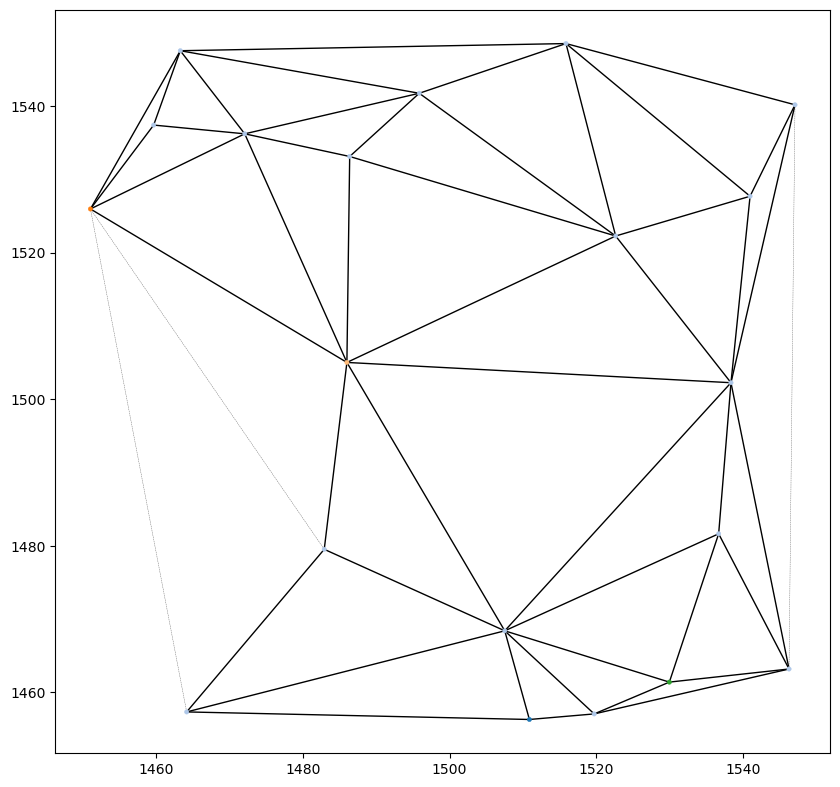

In [4]:
fig_save_root = 'test'
os.makedirs(fig_save_root, exist_ok=True)

cell_data = load_cell_data(
    cell_coords_file=cell_coords_file,
    cell_types_file=cell_types_file,
    # cell_biomarker_expression_file=cell_biomarker_expression_file,
    # cell_features_file=cell_features_file
    )

FOV_center = [1500, 1500]
# 将FOV_center的坐标转化为字符串
fov_center_str = f"at_x{FOV_center[0]}_y{FOV_center[1]}"
voronoi_polygon_img_output = os.path.join(fig_save_root, f"voronoi_{fov_center_str}.png")
graph_img_output = os.path.join(fig_save_root, f"graph_{fov_center_str}.png")


G = construct_graph_for_FOV(
    FOV_center=FOV_center, 
    range_radius=50,
    cell_data=cell_data, 
    voronoi_polygon_img_output=voronoi_polygon_img_output,
    graph_img_output=graph_img_output)

In [5]:
G

In [6]:
list(G.nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [7]:
list(G.edges)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 19),
 (1, 1),
 (1, 3),
 (1, 4),
 (1, 9),
 (1, 17),
 (1, 19),
 (2, 2),
 (2, 11),
 (2, 12),
 (2, 14),
 (3, 3),
 (3, 10),
 (3, 17),
 (4, 4),
 (4, 8),
 (4, 9),
 (4, 19),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 18),
 (5, 19),
 (6, 6),
 (6, 7),
 (6, 12),
 (6, 18),
 (7, 7),
 (7, 12),
 (7, 13),
 (8, 8),
 (8, 9),
 (8, 19),
 (9, 9),
 (9, 16),
 (9, 17),
 (10, 10),
 (10, 11),
 (10, 15),
 (10, 16),
 (10, 17),
 (11, 11),
 (11, 14),
 (11, 15),
 (11, 16),
 (12, 12),
 (12, 13),
 (12, 14),
 (12, 18),
 (12, 19),
 (13, 13),
 (13, 14),
 (14, 14),
 (15, 16),
 (15, 15),
 (16, 16),
 (16, 17),
 (17, 17),
 (18, 18),
 (18, 19),
 (19, 19)]

In [8]:
torch.tensor(list(G.edges()), dtype=torch.long).t().contiguous()

tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,
          3,  3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,
          7,  7,  8,  8,  8,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 12,
         12, 12, 12, 12, 13, 13, 14, 15, 15, 16, 16, 17, 18, 18, 19],
        [ 0,  1,  2,  3, 10, 11, 12, 19,  1,  3,  4,  9, 17, 19,  2, 11, 12, 14,
          3, 10, 17,  4,  8,  9, 19,  5,  6,  7,  8, 18, 19,  6,  7, 12, 18,  7,
         12, 13,  8,  9, 19,  9, 16, 17, 10, 11, 15, 16, 17, 11, 14, 15, 16, 12,
         13, 14, 18, 19, 13, 14, 14, 16, 15, 16, 17, 17, 18, 19, 19]])

In [9]:
G.adj

AdjacencyView({0: {0: {'distance': 0.0, 'edge_type': 'neighbor'}, 1: {'distance': 40.52805296151364, 'edge_type': 'neighbor'}, 2: {'distance': 25.684323337738572, 'edge_type': 'neighbor'}, 3: {'distance': 28.104064561356346, 'edge_type': 'neighbor'}, 10: {'distance': 34.16776646397516, 'edge_type': 'neighbor'}, 11: {'distance': 40.778572865525504, 'edge_type': 'neighbor'}, 12: {'distance': 42.48277198921362, 'edge_type': 'neighbor'}, 19: {'distance': 52.47848250655227, 'edge_type': 'neighbor'}}, 1: {0: {'distance': 40.52805296151364, 'edge_type': 'neighbor'}, 1: {'distance': 0.0, 'edge_type': 'neighbor'}, 3: {'distance': 37.88036980371171, 'edge_type': 'neighbor'}, 4: {'distance': 19.12218134764027, 'edge_type': 'neighbor'}, 9: {'distance': 27.11854270699837, 'edge_type': 'neighbor'}, 17: {'distance': 33.12880863150006, 'edge_type': 'neighbor'}, 19: {'distance': 25.46059350868838, 'edge_type': 'neighbor'}}, 2: {0: {'distance': 25.684323337738572, 'edge_type': 'neighbor'}, 2: {'distance

In [10]:
list(G.neighbors(0))

[0, 1, 2, 3, 10, 11, 12, 19]

In [11]:
print(G.nodes[0])

{'voronoi_polygon': array([[   0.        , 1212.81885834],
       [1448.1770278 , 1489.86142826],
       [1487.39735036, 1456.68237965],
       [1487.48874022, 1456.32398804],
       [1455.38879015,    0.        ],
       [1264.12067035,    0.        ],
       [   0.        ,    0.        ],
       [   0.        , 1052.659151  ],
       [   0.        , 1212.81885834]]), 'cell_id': 1426, 'center_coord': (1485.9808219999995, 1505.0278750000002), 'cell_type': 'PVM', 'biomarker_expression': {}}


In [5]:
import pandas as pd
from torch_geometric.data import Data
from torch_geometric.nn import MessagePassing

# --- 1. 从 CSV 文件生成 one-hot 特征矩阵 ---
# 假设 CSV 文件路径为 'adata_subclass.csv'
subclass_data = pd.read_csv('data/cortex/adata_subclass.csv')

# 2. 提取所有唯一的 SUBCLASS 类型
unique_subclasses = sorted(subclass_data['SUBCLASS'].unique())
print("Unique subclasses:", unique_subclasses)

# 3. 创建 subclass 到 one-hot 编码的映射
subclass_to_idx = {subclass: idx for idx, subclass in enumerate(unique_subclasses)}
print("Subclass to index mapping:", subclass_to_idx)

# 4. 构建一个 one-hot 特征矩阵 X [N, num_classes]，其中 N 为节点数
N = G.number_of_nodes()
num_classes = len(unique_subclasses)

# 创建一个全零的特征矩阵
x = torch.zeros(N, num_classes, dtype=torch.float)

# 根据 CSV 中的 SUBCLASS 生成 one-hot 编码特征矩阵
# 构建一个 map，将 CELL_ID 映射到 SUBCLASS
cell_id_to_subclass = {row['CELL_ID']: row['SUBCLASS'] for _, row in subclass_data.iterrows()}

# 为每个节点根据 cell_id 查找对应的 SUBCLASS，并设置对应的 one-hot 特征
for node, data in G.nodes(data=True):
    cell_id = data.get('cell_id', None)  # 假设节点有 'cell_id' 属性
    if cell_id is not None and cell_id in cell_id_to_subclass:
        subclass = cell_id_to_subclass[cell_id]
        subclass_idx = subclass_to_idx[subclass]
        node_idx = node  # node 是图中的节点索引
        x[node_idx, subclass_idx] = 1.0  # 将该位置设为 1

# --- 2. 提取 edge_index ---
# 生成 shape [2, E] 的长整型张量
edge_index = torch.tensor(list(G.edges()), dtype=torch.long).t().contiguous()

Unique subclasses: ['Astrocytes', 'Endothelial', 'L23_IT', 'L45_IT', 'L56_NP', 'L5_IT', 'L5_PT', 'L6_CT', 'L6_IT', 'L6b', 'Lamp5', 'Microglia', 'OPC', 'Oligodendrocytes', 'PVM', 'Pericytes', 'Pvalb', 'SMC', 'Sncg', 'Sst', 'Sst_Chodl', 'VLMC', 'Vip', 'other']
Subclass to index mapping: {'Astrocytes': 0, 'Endothelial': 1, 'L23_IT': 2, 'L45_IT': 3, 'L56_NP': 4, 'L5_IT': 5, 'L5_PT': 6, 'L6_CT': 7, 'L6_IT': 8, 'L6b': 9, 'Lamp5': 10, 'Microglia': 11, 'OPC': 12, 'Oligodendrocytes': 13, 'PVM': 14, 'Pericytes': 15, 'Pvalb': 16, 'SMC': 17, 'Sncg': 18, 'Sst': 19, 'Sst_Chodl': 20, 'VLMC': 21, 'Vip': 22, 'other': 23}


In [13]:
x.shape

torch.Size([20, 24])

In [14]:
edge_index.shape

torch.Size([2, 69])

In [6]:
# --- 3. 定义一个 AX 聚合层 ---
class AXConv(MessagePassing):
    def __init__(self):
        # 使用 sum 聚合
        super().__init__(aggr='add')

    def forward(self, x, edge_index):
        # propagate 会对每条边 (i->j) 把 x[i] 累加到 j 上
        neigh_sum = self.propagate(edge_index, x=x)
        # 再加上自身特征
        return neigh_sum + x

    def message(self, x_j):
        # x_j 就是 source 节点特征，直接返回
        return x_j

In [7]:
# --- 4. 封装成 Data 并前向 ---
data = Data(x=x, edge_index=edge_index)
conv = AXConv()
out = conv(data.x, data.edge_index)

print("输入:", data.x)
print("输出:", out)

输入: tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [8]:
from torch_geometric.nn import global_add_pool

out = conv(out, data.edge_index)
out = global_add_pool(out, batch=None, size=G.number_of_nodes())
print(out)

tensor([[  8.,   0., 250.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  18.,   0.,
           0.,   0.,  53.,  23.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])


In [17]:
cell_coords_file = 'data/voronoi/UPMC_c001_v001_r001_reg001.cell_data.csv'
cell_types_file = 'data/voronoi/UPMC_c001_v001_r001_reg001.cell_types.csv'
cell_biomarker_expression_file = 'data/voronoi/UPMC_c001_v001_r001_reg001.expression.csv'
cell_features_file = 'data/voronoi/UPMC_c001_v001_r001_reg001.cell_features.csv'

Time taken to construct the graph: 0.39 seconds


<Figure size 640x480 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

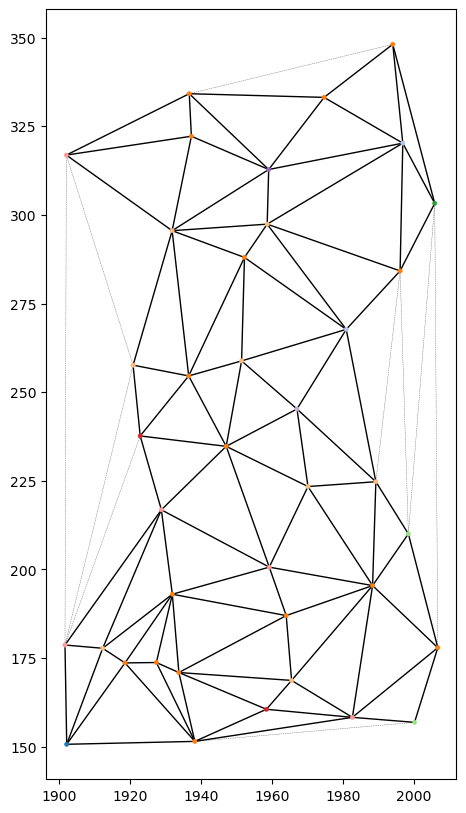

In [18]:
FOV_center = [2000, 250]
# 将FOV_center的坐标转化为字符串
fov_center_str = f"at_x{FOV_center[0]}_y{FOV_center[1]}"
voronoi_polygon_img_output = os.path.join(fig_save_root, f"voronoi_{fov_center_str}.png")
graph_img_output = os.path.join(fig_save_root, f"graph_{fov_center_str}.png")


G = construct_graph_for_FOV(
    FOV_center=FOV_center, 
    range_radius=100, 
    cell_data=cell_data, 
    voronoi_polygon_img_output=voronoi_polygon_img_output,
    graph_img_output=graph_img_output)

In [19]:
print(G.nodes[0])

{'voronoi_polygon': array([[1980.52380421,   22.95942614],
       [1992.42741569,  170.8388988 ],
       [2026.75393868,  160.13397746],
       [2026.75393868,    0.        ],
       [1982.51415733,    0.        ],
       [1980.52380421,   22.95942614]]), 'cell_id': 680, 'center_coord': (1902.0388219999995, 150.70649500000036), 'cell_type': 'Endothelial', 'biomarker_expression': {}}
